# Import All Required Libraries

We begin by importing all the Python libraries used for:
- Data loading and manipulation (pandas, numpy)
- Visualization (matplotlib, seaborn)
- Machine Learning (sklearn)


In [145]:
# 📦 Importing all required libraries
import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#  Load and Read the Dataset

The dataset is in a ZIP file. We extract and load it using pandas.


```
# This is formatted as code
```



In [146]:
zip_path = "/content/thyroid+disease.zip"
extract_path = "content/thyroid_disease"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: List extracted files to identify the relevant CSV or data file
extracted_files = os.listdir(extract_path)
extracted_files

['thyroid.theory',
 'new-thyroid.data',
 'sick.names',
 'allrep.data',
 'sick.test',
 'ann-thyroid.names',
 'ann-Readme',
 'hypothyroid.data',
 'dis.names',
 'sick-euthyroid.names',
 'new-thyroid.names',
 'allhypo.test',
 'allbp.names',
 'sick-euthyroid.data',
 'allrep.names',
 'allhyper.data',
 'allhyper.test',
 'HELLO',
 'Index',
 'sick.data',
 'dis.test',
 'thyroid0387.data',
 'allhypo.data',
 'allhypo.names',
 'allhyper.names',
 'allbp.test',
 'hypothyroid.names',
 'thyroid0387.names',
 'allbp.data',
 'allrep.test',
 'costs',
 'dis.data',
 'ann-train.data',
 'ann-test.data']

In [147]:
# Load the 'new-thyroid.data' file with appropriate column names
file_path = os.path.join(extract_path, 'new-thyroid.data')
column_names = ['Class', 'Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5']

# Read the dataset
df = pd.read_csv(file_path, names=column_names, header=None)

# Understand Dataset Structure

We explore the data using:
- df.head() to see the top rows
- df.info() to check data types and nulls
- df.describe() to summarize numeric values


In [148]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Class       215 non-null    int64  
 1   Attribute1  215 non-null    int64  
 2   Attribute2  215 non-null    float64
 3   Attribute3  215 non-null    float64
 4   Attribute4  215 non-null    float64
 5   Attribute5  215 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 10.2 KB


In [149]:
df.describe()


,Class,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,1.441860,109.595349,9.804651,2.050233,2.880000,4.199070
std,0.726737,13.145447,4.697362,1.419486,6.118031,8.070519
min,1.000000,65.000000,0.500000,0.200000,0.100000,-0.700000
25%,1.000000,103.000000,7.100000,1.350000,1.000000,0.550000
50%,1.000000,110.000000,9.200000,1.700000,1.300000,2.000000
75%,2.000000,117.500000,11.300000,2.200000,1.700000,4.100000
max,3.000000,144.000000,25.300000,10.000000,56.400000,56.300000


#  Check for Missing Values

We check for nulls using isnull().sum()


In [150]:
df.isnull().sum()


,0
Class,0
Attribute1,0
Attribute2,0
Attribute3,0
Attribute4,0
Attribute5,0


# Exploring Our Target Variable: 'Class' Distribution

In classification problems, it's important to check how balanced the target classes are. If one class has significantly more examples than the others, the model might become biased toward predicting that dominant class.

Let's take a look at the number of cases for each thyroid condition in our dataset.


Distribution of 'Class' variable:
Class
1    150
2     35
3     30
Name: count, dtype: int64


<ipython-input-151-4244378087>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


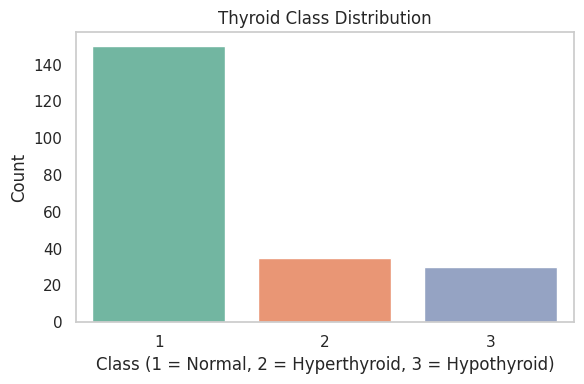

In [151]:
# Check the distribution of the target variable 'Class'
print("Distribution of 'Class' variable:")
print(df['Class'].value_counts())

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title("Thyroid Class Distribution")
plt.xlabel("Class (1 = Normal, 2 = Hyperthyroid, 3 = Hypothyroid)")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Uncovering Relationships: Correlation Heatmap

To understand how different features are related to each other and to the target 'Class', we can use a **correlation heatmap**.

If the value is close to **1**, the features increase together. If it's close to **-1**, one goes up while the other goes down. Values near **0** mean there's no clear link between them.


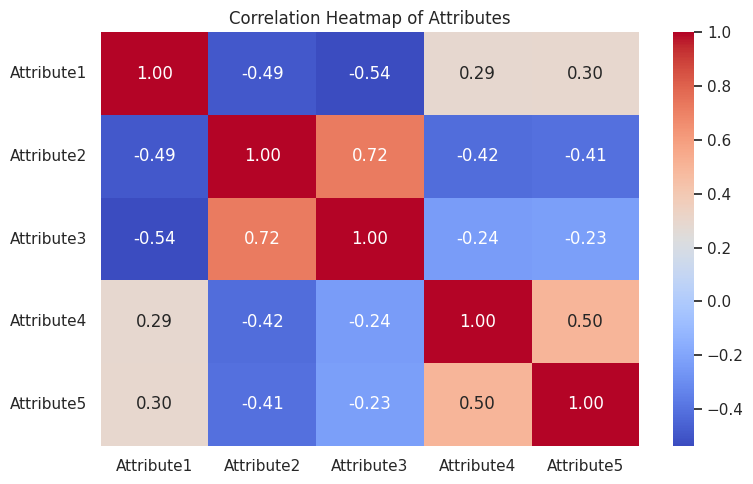

In [152]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Attributes")
plt.tight_layout()
plt.show()

# Pair plot
A pair plot (or scatterplot matrix) is used to visualize the pairwise relationships between multiple variables in a dataset. It generates a grid of scatter plots for each pair of numerical variables and often includes histograms or kernel density estimations on the diagonal to show the distribution of individual variables.

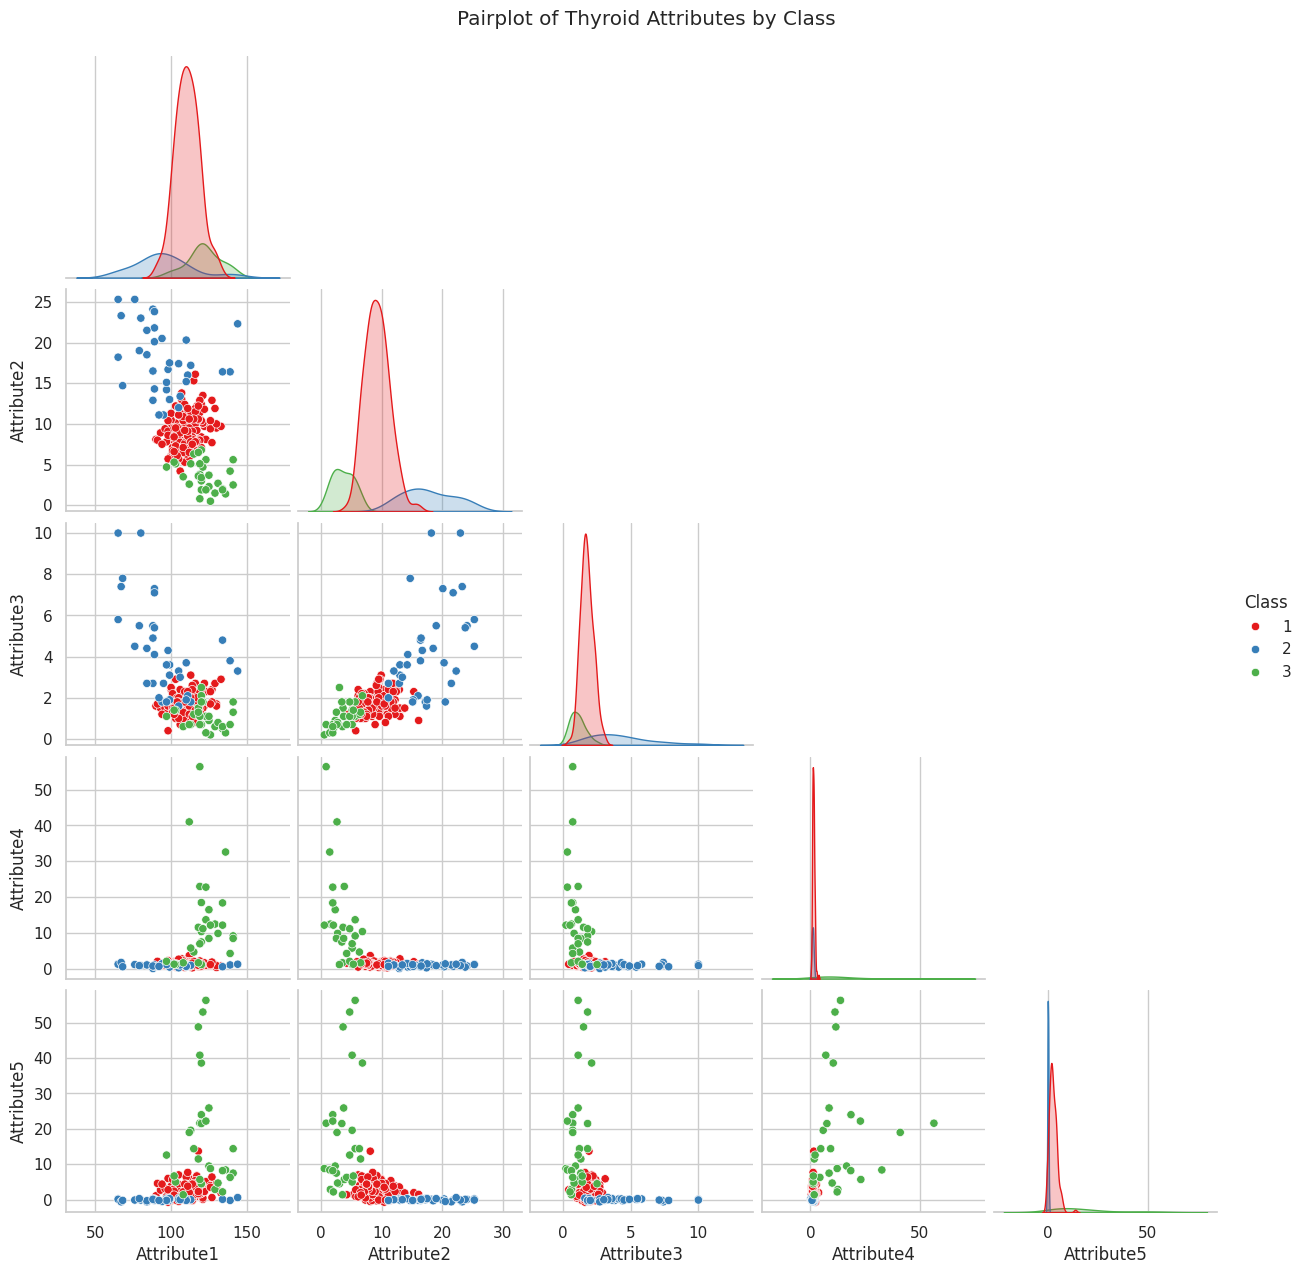

In [153]:
#  Pairplot
sns.pairplot(df, hue='Class', corner=True, palette='Set1')
plt.suptitle("Pairplot of Thyroid Attributes by Class", y=1.02)
plt.show()

# Box plot
A box plot is a simple way to show how data is spread. The box represents the middle 50% of the data (from the first to the third quartile), and a line inside the box marks the median. The whiskers extend to the smallest and largest values within a typical range. Any values beyond the whiskers are shown as outliers, indicating unusually high or low data points.**bold text**

<ipython-input-154-15334344>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='Pastel1')


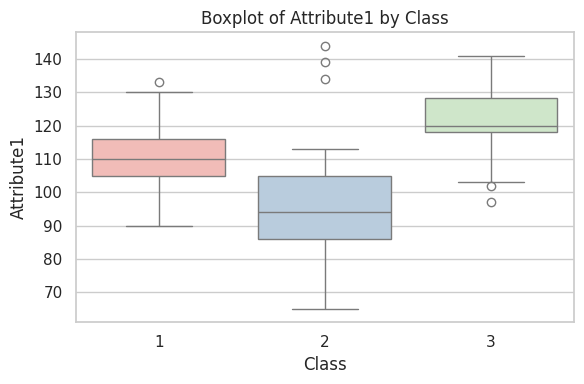

<ipython-input-154-15334344>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='Pastel1')


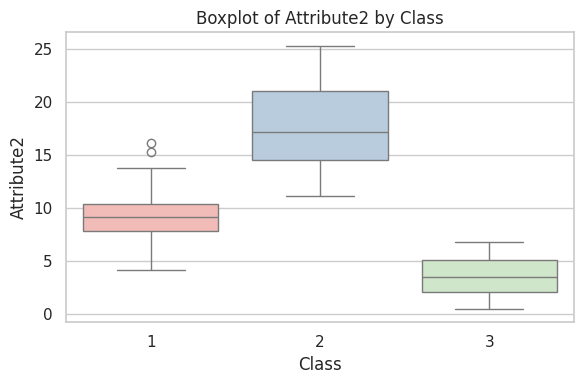

<ipython-input-154-15334344>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='Pastel1')


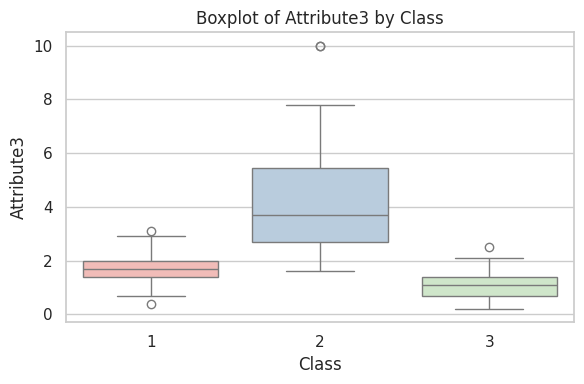

<ipython-input-154-15334344>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='Pastel1')


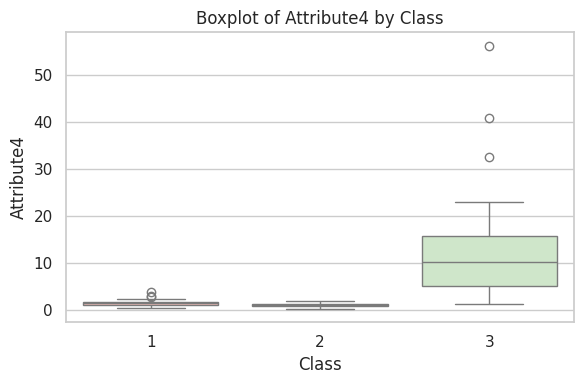

<ipython-input-154-15334344>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='Pastel1')


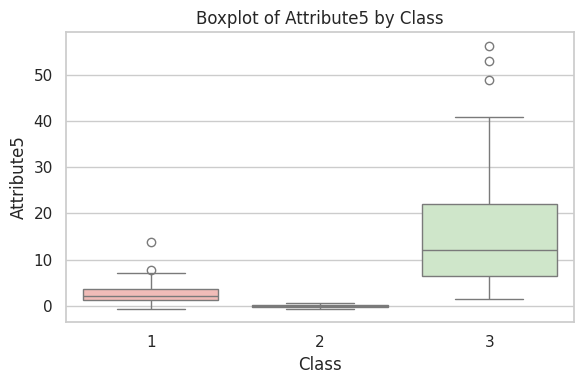

In [154]:

#  Boxplots for each attribute
for col in df.columns[1:]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y=col, data=df, palette='Pastel1')
    plt.title(f"Boxplot of {col} by Class")
    plt.tight_layout()
    plt.show()

# Feature Scaling with StandardScaler

Before training a machine learning model, it's important to **scale the features** so that they all have the same range. This helps many algorithms perform better, especially those that rely on distance or gradient calculations.

Here, we use `StandardScaler` from scikit-learn to standardize the features in our dataset. This scales the data so that each feature has a **mean of 0** and a **standard deviation of 1**.

We apply the scaling only to the feature columns and keep the target variable (`Class`) unchanged. Below are the first few rows of the scaled dataset.


In [155]:
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Extract feature columns
features = df.drop('Class', axis=1)
target = df['Class']

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with scaled values
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['Class'] = target.values

# Display the first few rows of the scaled dataset
df_scaled.head()


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Class
0,-0.197894,0.063022,0.105754,-0.324389,-0.186180,1
1,0.259603,0.020346,0.741266,-0.144173,0.211250,1
2,1.327096,0.660493,0.246979,-0.242472,-0.446993,1
3,-0.045395,-0.961213,-0.317920,-0.242472,-0.335216,1
4,-0.350393,-0.534448,-0.388533,-0.226089,-0.533931,1


# Data Cleaning

We remove any rows with missing values using dropna().


In [156]:
df_clean = df.dropna()
df_clean.shape


(215, 6)

#  Feature and Target Separation

We separate features (X) and the target column (y).


```
`# This is formatted as code`
```



In [157]:
X = df_clean.drop("Class", axis=1)
y = df_clean["Class"]


#  Feature Scaling

We scale the features using StandardScaler to improve model training.


In [158]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#  Train-Test Split

We split the data into training and testing sets (80/20).


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#  Train Random Forest Classifier

Random Forest is an ensemble model — robust and accurate for classification.


In [160]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


#  Evaluate Random Forest

We check model performance using:
- Accuracy
- Classification report
- Confusion matrix


In [161]:
print("🌳 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_preds))


🌳 Random Forest Results
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43


Confusion Matrix:
 [[28  0  0]
 [ 0  8  0]
 [ 0  0  7]]


# 📈 Step 11: Feature Importance Plot

We visualize which features most impacted the predictions.


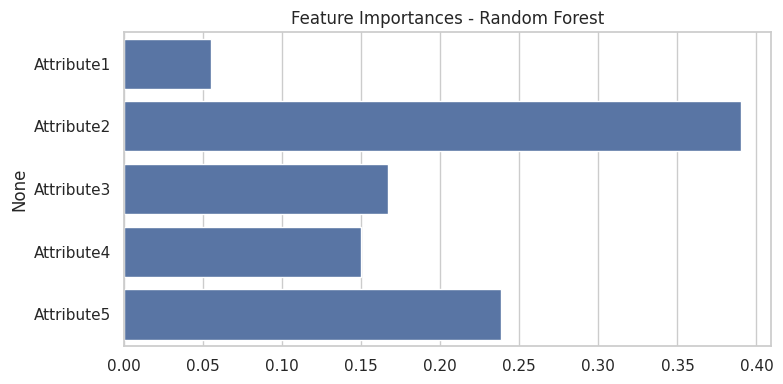

In [162]:
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


# Train Logistic Regression Model

A simpler, baseline model for classification.


In [163]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)


# Evaluate Logistic Regression

We evaluate the performance of the logistic regression model.


In [164]:
print("📈 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("\nClassification Report:\n", classification_report(y_test, lr_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_preds))


📈 Logistic Regression Results
Accuracy: 0.9534883720930233

Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        28
           2       1.00      0.88      0.93         8
           3       1.00      0.86      0.92         7

    accuracy                           0.95        43
   macro avg       0.98      0.91      0.94        43
weighted avg       0.96      0.95      0.95        43


Confusion Matrix:
 [[28  0  0]
 [ 1  7  0]
 [ 1  0  6]]
